# Iteration 1

## Connecting Colabs to BigQuery project

In [ ]:
#  Install Required Packages in Colab
!pip install --upgrade google-cloud-bigquery

In [ ]:
# Authenticate with Google Account
from google.colab import auth
auth.authenticate_user()





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cinemaparadiso-462409-f2ba92221c1f.json to cinemaparadiso-462409-f2ba92221c1f.json


In [ ]:
from google.oauth2 import service_account
from google.cloud import bigquery

key_path = "cinemaparadiso-462409-f2ba92221c1f.json"

credentials = service_account.Credentials.from_service_account_file(key_path)

project_id = "cinemaparadiso-462409"

client = bigquery.Client(credentials=credentials, project=project_id)
client = bigquery.Client(project="cinemaparadiso-462409")

## Import files from Big Query


In [ ]:
import pandas as pd

In [ ]:
# Read table cleaned_imdb_movies
query = "SELECT * FROM `cinemaparadiso-462409.cinema_paradiso.fa_regression_prediction_score`"
df_merged = client.query(query).to_dataframe()

## Data Exploration

In [ ]:
df_merged.isnull().sum()

,0
norm_title,0
year,3
duration,10704
worldwide_gross,16043
language,9222
score_cinema,14635
score_netflix,14791
score_bfi,17377
score_stats,16043
score_ibmb,15387


<Axes: >

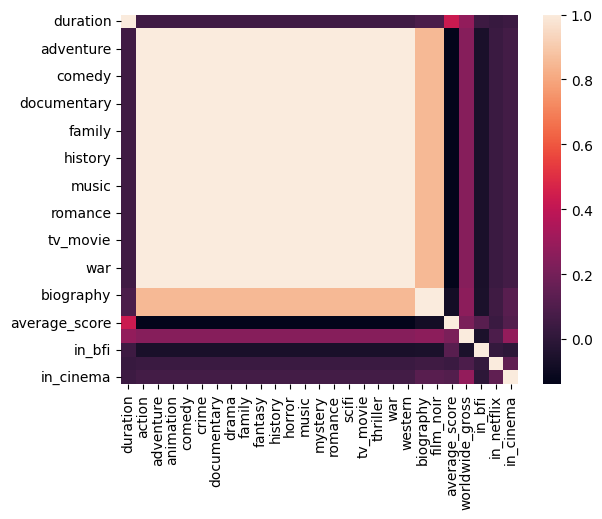

In [ ]:
import seaborn as sns

sns.heatmap(df_merged_cleaned_b[['duration', 'action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'mystery', 'romance', 'scifi', 'tv_movie', 'thriller', 'war',
       'western', 'biography', 'film_noir', 'average_score', 'worldwide_gross', 'in_bfi', 'in_netflix', 'in_cinema']].corr())

# Linear Regression:

Even though I don't expect any good prediction based on the available features, I wanted to test an apply a model just for training purposes

## Genre and Duration

In [ ]:
# DATA CLEANING
# Clean the data so that I only use the data where duration and genre are not null
import pandas as pd

mask1 = pd.notnull(df_merged["duration"])

df_merged_cleaned1 = df_merged[mask1]

# 1. If df_merged_cleaned1 might be a slice, make an explicit copy:
df_merged_cleaned2 = df_merged_cleaned1.copy()

# 2. Compute the average of the five score columns, skipping any nulls:
score_cols = ['score_cinema', 'score_netflix', 'score_bfi', 'score_stats','score_ibmb']
df_merged_cleaned2['average_score'] = df_merged_cleaned2[score_cols].mean(axis=1)

# 3. delete rows with null average scores
mask2 = pd.notnull(df_merged_cleaned2['average_score'])
df_merged_cleaned_a = df_merged_cleaned2[mask2]


In [ ]:
from sklearn.linear_model import LinearRegression

# ASSIGN X AND y

X = df_merged_cleaned_a[['duration', 'action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'mystery', 'romance', 'scifi', 'tv_movie', 'thriller', 'war',
       'western', 'biography', 'film_noir']]
y = df_merged_cleaned_a['average_score']

In [ ]:
# TRAIN SPLIT AND TRANSFORM

# import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# define the train and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

#check the shape of the variables
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape



((6571, 22), (2191, 22), (6571,), (2191,))

In [ ]:
#TRAIN THE MODEL

# import sklearn.LinearRegresion
from sklearn.linear_model import LinearRegression

# inititialise the model
model = LinearRegression()

# train the model
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
# R2 score
model.score(Xtrain, ytrain)

0.03458533693065613

In [ ]:
# MSE (mean squared error)

#import mean_squared_error libary from sklearn.metrics
from sklearn.metrics import mean_squared_error

# check the mean_squared_error (y is the real data and model.predict(X) the predicted value)
mean_squared_error(ytrain, model.predict(Xtrain))

1.0671402287824239

In [ ]:
# MAE (mean absolute error)

#import mean_absolute_error libary from sklearn.metrics
from sklearn.metrics import mean_absolute_error

# check the mean_absolute_error (y is the real data and model.predict(X) the predicted value)
mean_absolute_error(ytrain, model.predict(Xtrain))

0.7965342368983872

## Genre, Duration wordwide_gross

In [ ]:
# DATA CLEANING
# Clean the data so that I only use the data where duration and genre are not null

# 3. delete rows with null wordwide_gross
mask3 = pd.notnull(df_merged_cleaned_a['worldwide_gross'])
df_merged_cleaned_b = df_merged_cleaned_a[mask3]

In [ ]:
# ASSIGN X AND y

X = df_merged_cleaned_b[['duration', 'action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'mystery', 'romance', 'scifi', 'tv_movie', 'thriller', 'war',
       'western', 'biography', 'film_noir', 'worldwide_gross']]
y = df_merged_cleaned_b['average_score']

In [ ]:
# TRAIN SPLIT AND TRANSFORM

# define the train and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

#check the shape of the variables
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3042, 23), (1015, 23), (3042,), (1015,))

In [ ]:
# NUMERICAL STANDARD SCALE:

# 1. Select numerical data
Xtrain_num = Xtrain.select_dtypes(include="number")

Xtest_num = Xtest.select_dtypes(include="number")


# 2. import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# 3. TRAIN DATA
# intiantiate scaler
scaler = StandardScaler().set_output(transform="pandas")
# fit + transform!
scaled_Xtrain = scaler.fit_transform(Xtrain_num)

# 4. TEST DATA
# transform ONLY! we already created scaler, so we can re-use it
scaled_Xtest = scaler.transform(Xtest_num)

In [ ]:
# SELECT CATEGORICAL DATA
# train data
Xtrain_cat = Xtrain.select_dtypes(exclude="number")
# test data
Xtest_cat = Xtest.select_dtypes(exclude="number")

In [ ]:
# CONCATENATE
# concatenate
Xtrain_preprocessed = pd.concat([scaled_Xtrain, Xtrain_cat], axis=1)

Xtest_preprocessed = pd.concat([scaled_Xtest, Xtest_cat], axis=1)

In [ ]:
#TRAIN THE MODEL

# import sklearn.LinearRegresion
from sklearn.linear_model import LinearRegression

# inititialise the model
model = LinearRegression()

# train the model
model.fit(Xtrain_preprocessed, ytrain)

LinearRegression()

In [ ]:
# R2 score
model.score(Xtrain_preprocessed, ytrain)

0.23998822654375507

## Duration, wordwide_gross

In [ ]:
# ASSIGN X AND y

X = df_merged_cleaned_b[['duration', 'worldwide_gross']]
y = df_merged_cleaned_b['average_score']

In [ ]:
# TRAIN SPLIT AND TRANSFORM

# define the train and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

#check the shape of the variables
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3042, 2), (1015, 2), (3042,), (1015,))

In [ ]:
# 2. import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# 3. TRAIN DATA
# intiantiate scaler
scaler = StandardScaler().set_output(transform="pandas")
# fit + transform!
scaled_Xtrain = scaler.fit_transform(Xtrain_num)

# 4. TEST DATA
# transform ONLY! we already created scaler, so we can re-use it
scaled_Xtest = scaler.transform(Xtest_num)

In [ ]:
#TRAIN THE MODEL

# import sklearn.LinearRegresion
from sklearn.linear_model import LinearRegression

# inititialise the model
model = LinearRegression()

# train the model
model.fit(Xtrain_preprocessed, ytrain)

LinearRegression()

In [ ]:
# R2 score
model.score(Xtrain_preprocessed, ytrain)

0.23998822654375507

## Worldwide_gross


In [ ]:
# ASSIGN X AND y

X = df_merged_cleaned_b[['worldwide_gross']]
y = df_merged_cleaned_b['average_score']

In [ ]:
# TRAIN SPLIT AND TRANSFORM

# define the train and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

#check the shape of the variables
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3042, 1), (1015, 1), (3042,), (1015,))

In [ ]:
#TRAIN THE MODEL

# import sklearn.LinearRegresion
from sklearn.linear_model import LinearRegression

# inititialise the model
model = LinearRegression()

# train the model
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
# R2 score
model.score(Xtrain, ytrain)

0.0447052438370531

As expected, this features are not good to train the model. Also a logistic regression would be more suited, treating the rating variable as a non-numerical, categorical metric.